# SatPy Example of GOES True Color Animation
* https://github.com/pytroll/pytroll-examples/blob/master/satpy/GOES-16%20ABI%20-%20True%20Color%20Animation%20-%20Hurricane%20Florence.ipynb

In [ ]:
pwd

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import patheffects

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from datetime import datetime

In [2]:
day_of_year = datetime.now().timetuple().tm_yday
day_of_year = f"{day_of_year:03d}"
day_of_year

'255'

In [3]:
today = datetime.utcnow()
today_date = f"{today:%Y_%m_%d}"
date = 20210502
hour = "00"
today_date

'2021_09_12'

In [12]:
f"{today:%Y}"/day_of_year

'2021'

In [4]:
import os

In [5]:
os.chdir("../")

In [6]:
base_path = "/Users/chowdahead/wx-data"
file_path = f"{base_path}/{today_date}"
file_path = "src/"

In [7]:
data_path = f"{file_path}"
data_path

'src/'

In [8]:
import os
from satpy import Scene
from glob import glob
from satpy.multiscene import MultiScene
from matplotlib import patheffects


In [9]:
name = "SatPY_GOES_True"

In [20]:
hour = f"{today:%H}"
hour

'17'

In [16]:
year = f"{today:%Y}"
year

'2021'

In [25]:
! rclone --include $"*s{year}{day_of_year}{hour}01*" ls Public-AWS:noaa-goes16/ABI-L1b-RadC/{year}/{day_of_year}/{hour}

 15240938 OR_ABI-L1b-RadC-M6C01_G16_s20212551701191_e20212551703564_c20212551704003.nc
 79506187 OR_ABI-L1b-RadC-M6C02_G16_s20212551701191_e20212551703564_c20212551703588.nc
 16772738 OR_ABI-L1b-RadC-M6C03_G16_s20212551701191_e20212551703564_c20212551704025.nc
  3073741 OR_ABI-L1b-RadC-M6C04_G16_s20212551701191_e20212551703564_c20212551703593.nc
 16030732 OR_ABI-L1b-RadC-M6C05_G16_s20212551701191_e20212551703564_c20212551704011.nc
  4081845 OR_ABI-L1b-RadC-M6C06_G16_s20212551701191_e20212551703570_c20212551703597.nc
  4729371 OR_ABI-L1b-RadC-M6C07_G16_s20212551701191_e20212551703575_c20212551704020.nc
  3450350 OR_ABI-L1b-RadC-M6C08_G16_s20212551701191_e20212551703564_c20212551704009.nc
  3298917 OR_ABI-L1b-RadC-M6C09_G16_s20212551701191_e20212551703570_c20212551704017.nc
  3977782 OR_ABI-L1b-RadC-M6C10_G16_s20212551701191_e20212551703575_c20212551704022.nc
  5057194 OR_ABI-L1b-RadC-M6C11_G16_s20212551701191_e20212551703564_c20212551704006.nc
  4300553 OR_ABI-L1b-RadC-M6C12_G16_s202125

In [29]:
pwd

'/Users/chowdahead/Documents/GitHub/rando-daily-forecast'

In [30]:
os.chdir("src/")

In [31]:
for i in range(1,4):
    ! rclone --include $"*C0{i}*s{year}{day_of_year}{hour}01*" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{year}/{day_of_year}/{hour} ./

In [78]:
for i in [3,7]:
    ! rclone --include $"*C0{i}*s{year}{day_of_year}{hour}01*" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{year}/{day_of_year}/{hour} ./

In [79]:
for i in [14,16]:
    ! rclone --include $"*C{i}*s{year}{day_of_year}{hour}01*" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{year}/{day_of_year}/{hour} ./

In [103]:
for i in ["04","05","06","09",11,15]:
    ! rclone --include $"*C{i}*s{year}{day_of_year}{hour}01*" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{year}/{day_of_year}/{hour} ./

In [11]:
! rclone lsd Public-AWS:noaa-goes16/ABI-L1b-RadC

           0 2021-09-12 17:58:20        -1 2000
           0 2021-09-12 17:58:20        -1 2017
           0 2021-09-12 17:58:20        -1 2018
           0 2021-09-12 17:58:20        -1 2019
           0 2021-09-12 17:58:20        -1 2020
           0 2021-09-12 17:58:20        -1 2021


In [34]:
data_path

'src/'

In [35]:
BASE_DIR = './'
all_filenames = [glob(fn.replace('C01', 'C0[123]*')[:len(BASE_DIR) + 50] + '*.nc') for fn in sorted(glob(os.path.join(BASE_DIR, 'OR*-RadC-*C01*.nc')))]
scenes = [Scene(reader='abi_l1b', filenames=filenames) for filenames in all_filenames]
print("Number of Scenes: ", len(scenes))

Number of Scenes:  1


In [36]:
os.environ['PPP_CONFIG_DIR'] = '../satpy_config/'


In [ ]:
#ir_all_filenames = sorted(glob("*M6C14*"))
#ir_all_filenames.extend(sorted(glob("*M6C10*")))
#ir_all_filenames.extend(sorted(glob("*M6C12*")))
ir_all_filenames.extend(sorted(glob("*M6C13*")))
#ir_filenames = ir_all_filenames[::12]
ir_filenames

In [ ]:
cloudtop_all_filenames = sorted(glob("*M6C07*"))
cloudtop_all_filenames.extend(sorted(glob("*M6C15*")))
cloudtop_all_filenames.extend(sorted(glob("*M6C14*")))
cloudtop_filenames = cloudtop_all_filenames[::12]
cloudtop_filenames

In [ ]:
overview_all_filenames = sorted(glob("*M6C02*"))
overview_all_filenames.extend(sorted(glob("*M6C03*")))
overview_all_filenames.extend(sorted(glob("*M6C14*")))
overview_filenames = overview_all_filenames[::12]
overview_filenames

In [63]:
airmass_all_filenames = sorted(glob("*M6C08*"))
airmass_all_filenames.extend(sorted(glob("*M6C10*")))
airmass_all_filenames.extend(sorted(glob("*M6C12*")))
airmass_all_filenames.extend(sorted(glob("*M6C13*")))
#airmass_all_filenames

In [80]:
daymicro_all_filenames = sorted(glob("*M6C03*"))
daymicro_all_filenames.extend(sorted(glob("*M6C07*")))
daymicro_all_filenames.extend(sorted(glob("*M6C14*")))
daymicro_all_filenames.extend(sorted(glob("*M6C16*")))

In [ ]:
airmass_filenames = airmass_all_filenames[::12]
airmass_filenames

In [61]:
ls OR*

OR_ABI-L1b-RadC-M6C01_G16_s20212551701191_e20212551703564_c20212551704003.nc
OR_ABI-L1b-RadC-M6C02_G16_s20212551701191_e20212551703564_c20212551703588.nc
OR_ABI-L1b-RadC-M6C03_G16_s20212551701191_e20212551703564_c20212551704025.nc
OR_ABI-L1b-RadC-M6C08_G16_s20212551701191_e20212551703564_c20212551704009.nc


In [64]:
airmass_all_filenames

['OR_ABI-L1b-RadC-M6C08_G16_s20212551701191_e20212551703564_c20212551704009.nc',
 'OR_ABI-L1b-RadC-M6C10_G16_s20212551701191_e20212551703575_c20212551704022.nc',
 'OR_ABI-L1b-RadC-M6C12_G16_s20212551701191_e20212551703570_c20212551704014.nc',
 'OR_ABI-L1b-RadC-M6C13_G16_s20212551701191_e20212551703575_c20212551704038.nc']

In [85]:
def test_image(prod,file_list):
    #scn = Scene(reader='abi_l1b', filenames=file_list)
    #scn.load([prod])
    
    scn = Scene(reader='abi_l1b', filenames=file_list)
    scn.load([prod])
    new_scn = scn.resample(scn.min_area(), resampler='native')
    new_scn.save_dataset(prod, filename=prod+'.png')
    
    
    #scn = scn.resample(scn.min_area(), resampler='native')
    
    for i in file_list:
        if "C02" in i:
            scn = scn.resample(scn.min_area(), resampler='native')
            #scn.save_dataset('true_color', filename='true_color'+'.png')
           
    #scn = scn.resample(scn.min_area(), resampler='native')
    fig = plt.figure(figsize=(10, 5), dpi=200)
    #nc13 = Dataset(file_list[2])
    #sat_h = nc13.variables['goes_imager_projection'].perspective_point_height

    # Satellite longitude
    #sat_lon = nc.variables['goes_imager_projection'].longitude_of_projection_origin

    # Satellite sweep
    #sat_sweep = nc.variables['goes_imager_projection'].sweep_angle_axis

    # The projection x and y coordinates equals
    # the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
    #X = nc13.variables['x'][:] * sat_h
    #Y = nc13.variables['y'][:] * sat_h

    # Set the projections for plotting 
    #proj_var = nc13.variables['goes_imager_projection']
    #sat_height = proj_var.perspective_point_height
    #central_lon = proj_var.longitude_of_projection_origin
    #semi_major = proj_var.semi_major_axis
    #semi_minor = proj_var.semi_minor_axis

    #globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
    #crs = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height, globe=globe)

    #plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)

        # Add the map and set the extent
    ax = plt.subplot(111, projection=abi_crs) 
    #extent = [-130., -65, 20., 60.]

    #ax.set_extent(extent,ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='w',linewidth=0.2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='w',linewidth=0.2)
    
    var = get_enhanced_image(scn[prod]).data
    # Get true color data to use later and reorder the dimensions so matplotlib can use the image
    # Sadly, this operation is not lazy (bad performance) in xarray at the time of writing
    var = var.transpose('y', 'x', 'bands')
    ax.imshow(var,transform=abi_crs,
                        extent=(var.x[0], var.x[-1], var.y[-1], var.y[0]),origin='upper')
    outline_effect = [patheffects.withStroke(linewidth=2.5, foreground='black')]
    text_prod = ax.text(.005, 0.01, 
            "{0:%d-%B-%Y %H%MZ}".format(scn[prod].start_time),
            horizontalalignment='left', transform=ax.transAxes,
            color='white', fontsize=7, weight='bold',
                       )
    text_time = ax.text(.995, 0.01, 
            f'{var.attrs["orbital_slot"]} {var.attrs["scene_id"]} {prod.replace("_"," ")}',
            horizontalalignment='right', transform=ax.transAxes,
            color='white', fontsize=7, weight='bold',
                       )
    
    text_time.set_path_effects(outline_effect)
    text_prod.set_path_effects(outline_effect)
    
    
    #scn.save_dataset(prod, filename=f"{var.attrs['start_time']:%Y-%m-%d %H%MZ}_{prod}.png")
    plt.savefig(f"{var.attrs['start_time']:%Y_%m_%d_%H%MZ}_{prod}.png",bbox_inches="tight")

    plt.show()
    

day_microphysics


The following datasets were not created and may require resampling to be generated: DatasetID(name='day_microphysics', wavelength=None, resolution=None, polarization=None, calibration=None, level=None, modifiers=None)


KeyError: "No dataset matching 'DatasetID(name='day_microphysics', wavelength=None, resolution=None, polarization=None, calibration=None, level=None, modifiers=None)' found"

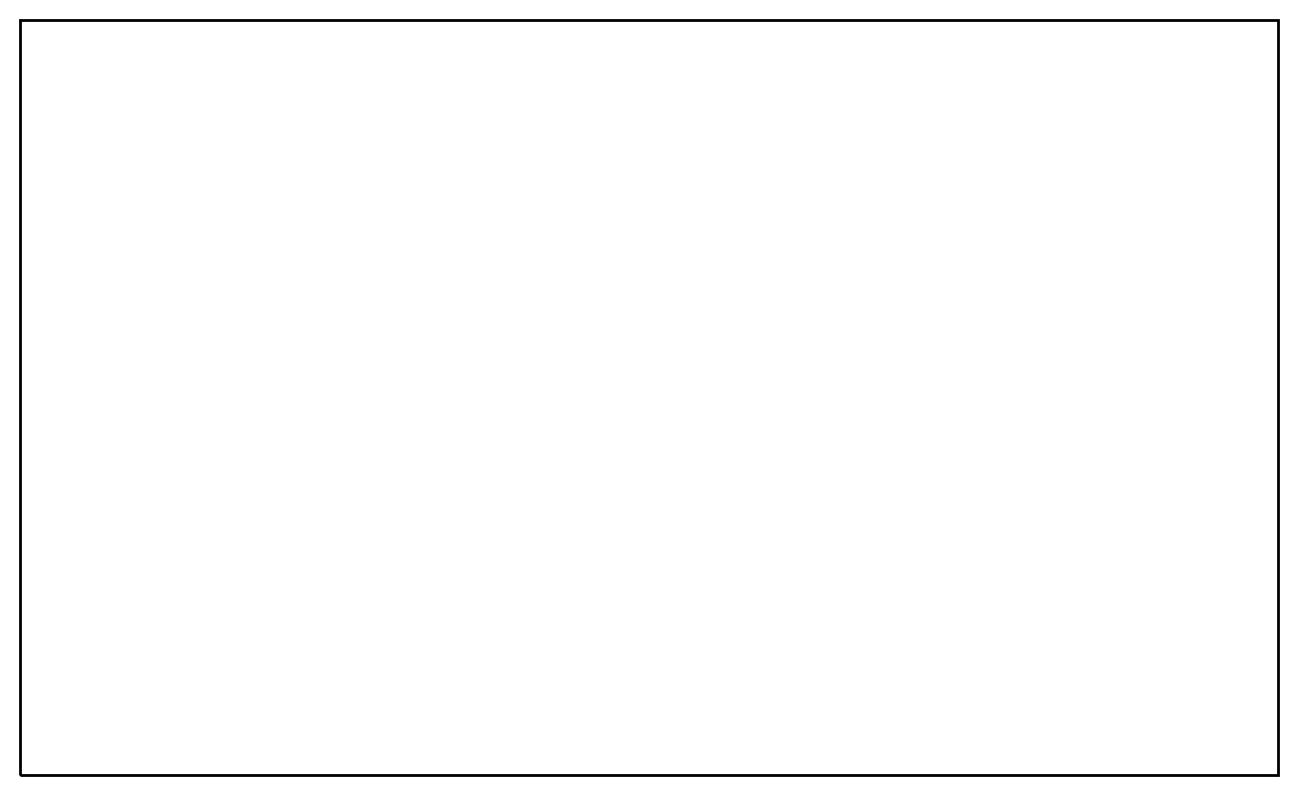

In [87]:
#prod = comps[11]
#daymicro_all_filenames
#'day_microphysics'
prod = 'day_microphysics'
print(prod)
#file_list = fill_filenames(woo[prod])
test_image(prod,daymicro_all_filenames)

The products that need resolution resampling are:
<ul>
    <li>True Color (and its derivatives)</li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
</ul>

In [ ]:
var.attrs["orbital_slot"]

In [ ]:
list(var.variable)

In [ ]:
f"{var.attrs['start_time']:%Y-%m-%d %H%MZ}"

In [ ]:
var.attrs['area']

In [ ]:
var.attrs['long_name']

In [ ]:
var.attrs["sensor"],var.attrs["orbital_slot"],var.attrs["scene_id"],var.attrs["platform_name"]

In [ ]:
list(var.attrs)

In [ ]:
scn = Scene(reader='abi_l1b', filenames=cloudtop_filenames)
scn.load(['cloudtop'])

In [83]:
scn = Scene(reader='abi_l1b', filenames=cloudtop_filenames)
scn.load(['cloudtop'])
#new_scn = scn.resample(scn.min_area(), resampler='native')
#new_scn.save_dataset('overview', filename='overview'+'.png')

NameError: name 'cloudtop_filenames' is not defined

In [ ]:
scn.values

In [ ]:
scn.save_dataset('cloudtop', filename='cloudtop'+'.png')

In [84]:
scn = Scene(reader='abi_l1b', filenames=daymicro_all_filenames)
scn.load(['day_microphysics'])
new_scn = scn.resample(scn.min_area(), resampler='native')
new_scn.save_dataset('day_microphysics', filename='day_microphysics'+'.png')
#scn.save_dataset('natural_color', filename='natural_color'+'.png')

The following datasets were not created and may require resampling to be generated: DatasetID(name='day_microphysics', wavelength=None, resolution=None, polarization=None, calibration=None, level=None, modifiers=None)
/Users/chowdahead/anaconda3/envs/comet-template/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/Users/chowdahead/anaconda3/envs/comet-template/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/Users/chowdahead/anaconda3/envs/comet-template/lib/python3.7/site-packages/satpy/resample.py:822: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data.reshape(new_shape), axis=(1, 3))


In [ ]:
pwd

In [ ]:
cd GOES/122/

In [ ]:
all_filenames[0]

In [39]:
scn = Scene(reader='abi_l1b', filenames=all_filenames[0])
scn.load(['true_color'])
 
new_scn = scn.resample(scn.min_area(), resampler='native')
#new_scn.save_dataset('true_color', filename='ahh_true_color'+'.png')

The following datasets were not created and may require resampling to be generated: DatasetID(name='true_color', wavelength=None, resolution=None, polarization=None, calibration=None, level=None, modifiers=None)


In [ ]:
var.

In [ ]:
var.attrs["orbital_parameters"]

In [ ]:
pwd

In [41]:

from satpy.writers import get_enhanced_image

In [ ]:
pwd

In [89]:
all_filenames

[['./OR_ABI-L1b-RadC-M6C02_G16_s20212551701191_e20212551703564_c20212551703588.nc',
  './OR_ABI-L1b-RadC-M6C01_G16_s20212551701191_e20212551703564_c20212551704003.nc',
  './OR_ABI-L1b-RadC-M6C03_G16_s20212551701191_e20212551703564_c20212551704025.nc']]

In [104]:
all_filenames = glob("OR*.nc")
all_filenames

['OR_ABI-L1b-RadC-M6C15_G16_s20212551701191_e20212551703570_c20212551704033.nc',
 'OR_ABI-L1b-RadC-M6C13_G16_s20212551701191_e20212551703575_c20212551704038.nc',
 'OR_ABI-L1b-RadC-M6C14_G16_s20212551701191_e20212551703564_c20212551704041.nc',
 'OR_ABI-L1b-RadC-M6C11_G16_s20212551701191_e20212551703564_c20212551704006.nc',
 'OR_ABI-L1b-RadC-M6C02_G16_s20212551701191_e20212551703564_c20212551703588.nc',
 'OR_ABI-L1b-RadC-M6C16_G16_s20212551701191_e20212551703576_c20212551704030.nc',
 'OR_ABI-L1b-RadC-M6C06_G16_s20212551701191_e20212551703570_c20212551703597.nc',
 'OR_ABI-L1b-RadC-M6C04_G16_s20212551701191_e20212551703564_c20212551703593.nc',
 'OR_ABI-L1b-RadC-M6C08_G16_s20212551701191_e20212551703564_c20212551704009.nc',
 'OR_ABI-L1b-RadC-M6C12_G16_s20212551701191_e20212551703570_c20212551704014.nc',
 'OR_ABI-L1b-RadC-M6C10_G16_s20212551701191_e20212551703575_c20212551704022.nc',
 'OR_ABI-L1b-RadC-M6C01_G16_s20212551701191_e20212551703564_c20212551704003.nc',
 'OR_ABI-L1b-RadC-M6C07_G16_

In [133]:
prod = "day_microphysics"
prod = "airmass"
prod = 'dust'
prod = 'convection'
#prod = 'natural_color'
#prod = 'ir_cloud_day'
#prod = "ir108_3d"
#prod = 'overview'
#prod = 'fog'
scn = Scene(reader='abi_l1b', filenames=all_filenames)
print(scn.all_composite_names())
scn.load([prod])
#for i in file_list:
#    if "C02" in i:
#        scn = scn.resample(scn.min_area(), resampler='native')
new_scn = scn.resample(scn.min_area(), resampler='native')
var = get_enhanced_image(new_scn[prod]).data
    # Get true color data to use later and reorder the dimensions so matplotlib can use the image
    # Sadly, this operation is not lazy (bad performance) in xarray at the time of writing
var = var.transpose('y', 'x', 'bands')
    
abi_crs = var.attrs['area'].to_cartopy_crs()

['airmass', 'ash', 'cloud_drop_effective_radius', 'cloud_optical_thickness', 'cloud_top_height', 'cloud_top_phase', 'cloud_top_pressure', 'cloud_top_temperature', 'cloud_water_path', 'cloudmask', 'cloudmask_extended', 'cloudtop', 'cloudtype', 'convection', 'day_microphysics', 'dust', 'fog', 'green', 'green_crefl', 'green_raw', 'green_snow', 'ice_water_path', 'ir108_3d', 'ir_cloud_day', 'liquid_water_path', 'natural_color', 'natural_color_raw', 'natural_color_sun', 'natural_with_night_fog', 'night_fog', 'night_microphysics', 'overview', 'overview_raw', 'overview_sun', 'precipitation_probability', 'snow', 'true_color', 'true_color_crefl', 'true_color_raw']


The following datasets were not created and may require resampling to be generated: DatasetID(name='convection', wavelength=None, resolution=None, polarization=None, calibration=None, level=None, modifiers=None)


In [46]:
var.x

<xarray.DataArray 'x' (x: 5000)>
array([-3626770.323782, -3625768.315125, -3624766.306467, ...,  1380266.938963,
        1381268.947621,  1382270.956279])
Coordinates:
  * x        (x) float64 -3.627e+06 -3.626e+06 ... 1.381e+06 1.382e+06

In [122]:
var.shape

(1500, 2500, 3)

In [49]:
abi_crs

_PROJ4Projection(+ellps=WGS84 +a=6378137.0 +b=6356752.31414 +h=35786023.0 +lon_0=-75.0 +proj=geos +sweep=x +units=m +no_defs)

/Users/chowdahead/anaconda3/envs/comet-template/lib/python3.7/site-packages/satpy/resample.py:822: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data.reshape(new_shape), axis=(1, 3))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


CPU times: user 8.41 s, sys: 5.1 s, total: 13.5 s
Wall time: 11.8 s


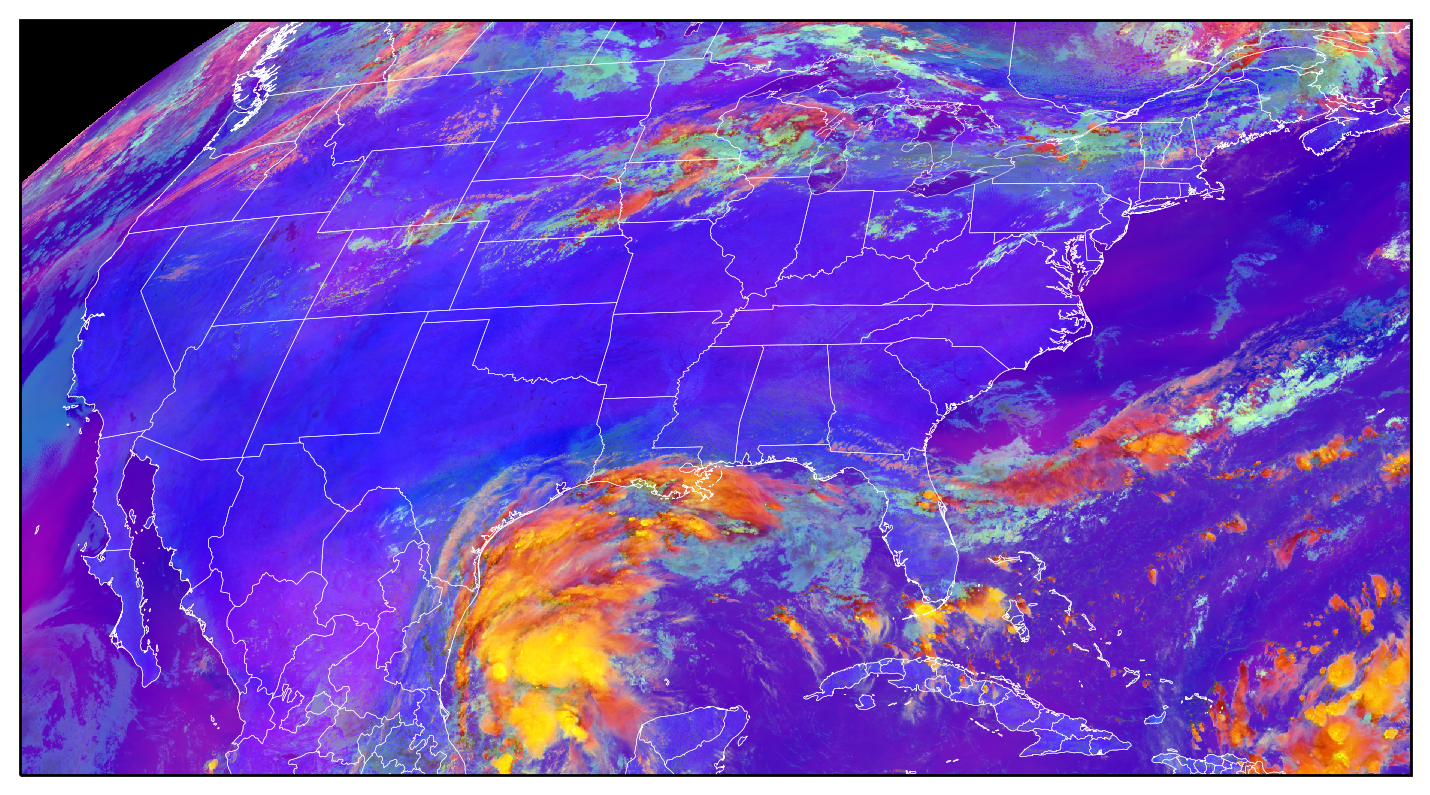

In [134]:
%%time
plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)
fig = plt.figure(figsize=(10, 5), dpi=200)
    # Add the map and set the extent
ax = plt.subplot(111, projection=abi_crs) 
extent = [-130., -65, 20., 60.]

ax.set_extent(extent,ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='w',linewidth=0.2)
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='w',linewidth=0.2)

"""if var.shape[2] > 2:
    goes = var[:,:,0]
else:
    goes = var"""

ax.imshow(var,transform=abi_crs,
                    extent=(var.x.min(), var.x.max(), var.y.min(), var.y.max()),origin='upper')
plt.savefig(f"goes_{prod}.png",bbox_inches="tight")


In [101]:
all_comps = scn.all_composite_names()
all_comps

['airmass',
 'ash',
 'cloud_drop_effective_radius',
 'cloud_optical_thickness',
 'cloud_top_height',
 'cloud_top_phase',
 'cloud_top_pressure',
 'cloud_top_temperature',
 'cloud_water_path',
 'cloudmask',
 'cloudmask_extended',
 'cloudtop',
 'cloudtype',
 'convection',
 'day_microphysics',
 'dust',
 'fog',
 'green',
 'green_crefl',
 'green_raw',
 'green_snow',
 'ice_water_path',
 'ir108_3d',
 'ir_cloud_day',
 'liquid_water_path',
 'natural_color',
 'natural_color_raw',
 'natural_color_sun',
 'natural_with_night_fog',
 'night_fog',
 'night_microphysics',
 'overview',
 'overview_raw',
 'overview_sun',
 'precipitation_probability',
 'snow',
 'true_color',
 'true_color_crefl',
 'true_color_raw']

In [ ]:
%%time
GOES16_samples_9 = []
for name in glob(f"/Users/chowdahead/wx-data/*M6C01*.nc"):
    GOES16_samples_9.append(name)
        #for name in glob.glob(GOES_sample_path+'OR*L2*RadC*C09*G16*s'+Year+str(Julian_Day)+'*.nc'):
        #    GOES16_samples_9.append(name)
        
GOES16_samples_9 = sorted(GOES16_samples_9)
    #print(list(GOES16_samples_9))
nc13 = Dataset(GOES16_samples_9[0])

ch13 = nc13.variables['Rad'][:]

    
fig = plt.figure(figsize=(10, 5), dpi=200)
sat_h = nc13.variables['goes_imager_projection'].perspective_point_height

    # Satellite longitude
    #sat_lon = nc.variables['goes_imager_projection'].longitude_of_projection_origin

    # Satellite sweep
    #sat_sweep = nc.variables['goes_imager_projection'].sweep_angle_axis

    # The projection x and y coordinates equals
    # the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = nc13.variables['x'][:] * sat_h
Y = nc13.variables['y'][:] * sat_h

    # Set the projections for plotting 
proj_var = nc13.variables['goes_imager_projection']
sat_height = proj_var.perspective_point_height
central_lon = proj_var.longitude_of_projection_origin
semi_major = proj_var.semi_major_axis
semi_minor = proj_var.semi_minor_axis



globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
crs = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height, globe=globe)

plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)

    # Add the map and set the extent
ax = plt.subplot(111, projection=plotcrs) 
extent = [-130., -65, 20., 60.]

ax.set_extent(extent,ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='w',linewidth=0.2)
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='w',linewidth=0.2)

#new_scn = scn.resample(scn.min_area(), resampler='native')

#new_scn.save_dataset('true_color', filename='true_color'+'.png')
scn = Scene(reader='abi_l1b', filenames=all_filenames)
scn.load(['dust'])
var = get_enhanced_image(scn["airmass"]).data
    # Get true color data to use later and reorder the dimensions so matplotlib can use the image
    # Sadly, this operation is not lazy (bad performance) in xarray at the time of writing
var = var.transpose('y', 'x', 'bands')
ax.imshow(var,transform=abi_crs,
                    extent=(X.min(), X.max(), Y.min(), Y.max()),origin='upper')
plt.savefig(f"/Users/chowdahead/Desktop/2021_03_14_1801_airmass_lambert.svg",bbox_inches="tight")


In [ ]:
data_path

In [ ]:
%%time
GOES16_samples_9 = []
for name in glob(f"{data_path}*M6C01*.nc"):
    GOES16_samples_9.append(name)
        #for name in glob.glob(GOES_sample_path+'OR*L2*RadC*C09*G16*s'+Year+str(Julian_Day)+'*.nc'):
        #    GOES16_samples_9.append(name)
        
GOES16_samples_9 = sorted(GOES16_samples_9)
    #print(list(GOES16_samples_9))
nc13 = Dataset(GOES16_samples_9[0])

ch13 = nc13.variables['Rad'][:]

    
fig = plt.figure(figsize=(10, 5), dpi=200)
sat_h = nc13.variables['goes_imager_projection'].perspective_point_height

    # Satellite longitude
    #sat_lon = nc.variables['goes_imager_projection'].longitude_of_projection_origin

    # Satellite sweep
    #sat_sweep = nc.variables['goes_imager_projection'].sweep_angle_axis

    # The projection x and y coordinates equals
    # the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = nc13.variables['x'][:] * sat_h
Y = nc13.variables['y'][:] * sat_h

    # Set the projections for plotting 
proj_var = nc13.variables['goes_imager_projection']
sat_height = proj_var.perspective_point_height
central_lon = proj_var.longitude_of_projection_origin
semi_major = proj_var.semi_major_axis
semi_minor = proj_var.semi_minor_axis



globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
crs = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height, globe=globe)

plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)

    # Add the map and set the extent
#ax = plt.subplot(111, projection=plotcrs,fc="k") 
#ax1 = fig.add_subplot(111, fc='k', projection=plotcrs)
#ax1 = fig.add_subplot(111, fc='k')

ax = fig.add_subplot(111, fc='None', projection=plotcrs)
#ax.background_patch.set_fill(False)
#ax1.background_patch.set_fill(False)
ax.background_patch.set_facecolor('k')
#extent = [-130., -65, 20., 60.]
extent = [-112., -98, 32., 46.]

ax.set_extent(extent,ccrs.PlateCarree())
#ax1.set_extent(extent,ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE.with_scale('10m'),edgecolor='w',linewidth=0.2)
ax.add_feature(cfeature.STATES.with_scale('10m'),edgecolor='w',linewidth=0.2)

#new_scn = scn.resample(scn.min_area(), resampler='native')


ax.imshow(var,transform=abi_crs,
                    extent=(X.min(), X.max(), Y.min(), Y.max()),origin='upper',
         #zorder=150
         )
plt.savefig(f"/Users/chowdahead/Desktop/2021_05_02_yuppers_truecolor_lambert.svg",bbox_inches="tight")


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure()
ax1 = fig.add_subplot(111, fc='b')
ax2 = fig.add_subplot(111, fc='None', projection=ccrs.Mercator())
ax2.background_patch.set_fill(False)
ax2.add_feature(cfeature.LAND)
ax2.coastlines(color='red', linewidth=0.75)
plt.show()

In [ ]:
fig.add_subplot?